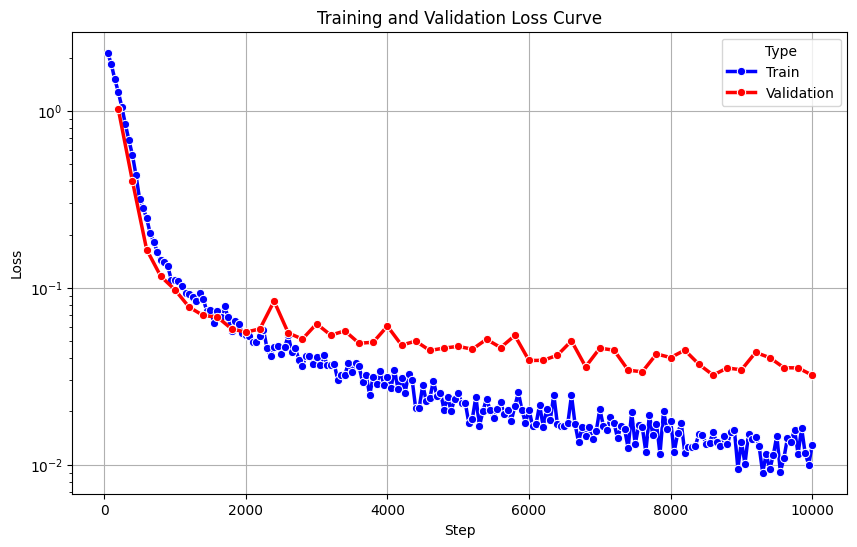

In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

with open('./results_patchmixer2/checkpoint-10000/trainer_state.json', 'r') as f:
    trainer_state = json.load(f)

log_history = trainer_state["log_history"]

train_data = [(entry["step"], entry["loss"], 'Train') for entry in log_history if "loss" in entry]
eval_data = [(entry["step"], entry["eval_loss"], 'Validation') for entry in log_history if "eval_loss" in entry]

data = pd.DataFrame(train_data + eval_data, columns=["Step", "Loss", "Type"])
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x="Step", y="Loss", hue="Type", marker='o', palette=["blue", "red"], linewidth=2.5)

plt.yscale('log')
plt.title("Training and Validation Loss Curve")
plt.grid(True)
plt.show()


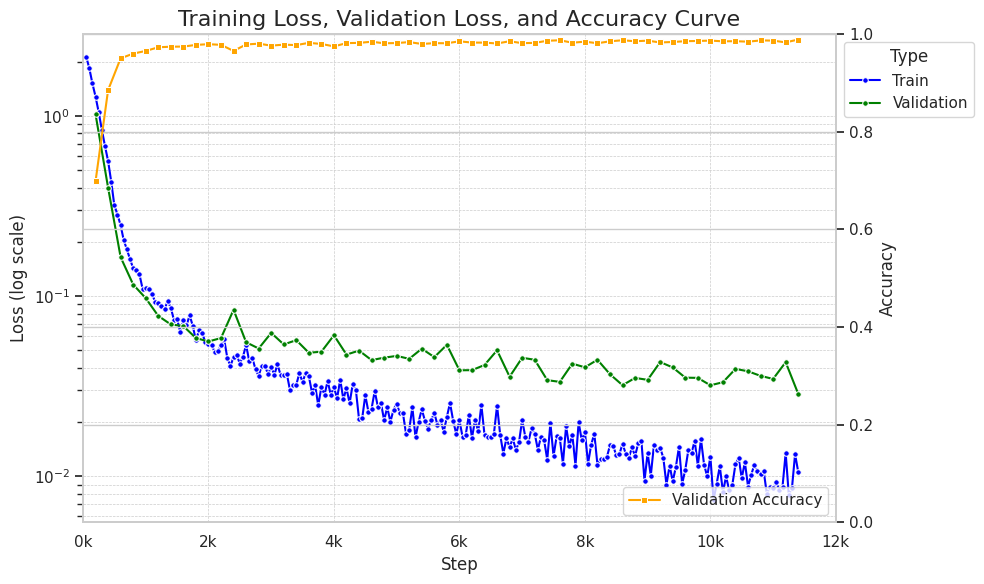

In [7]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 读取 JSON 文件
with open('./results_patchmixer2/checkpoint-11400/trainer_state.json', 'r') as f:
    trainer_state = json.load(f)

log_history = trainer_state["log_history"]

# 提取训练损失、验证损失
train_data = [(entry["step"], entry["loss"], 'Train') for entry in log_history if "loss" in entry]
eval_data = [(entry["step"], entry["eval_loss"], 'Validation') for entry in log_history if "eval_loss" in entry]
eval_acc_data = [(entry["step"], entry["eval_accuracy"]) for entry in log_history if "eval_accuracy" in entry]

# 构建 DataFrame
loss_data = pd.DataFrame(train_data + eval_data, columns=["Step", "Loss", "Type"])
acc_data = pd.DataFrame(eval_acc_data, columns=["Step", "Accuracy"])

# 设置画布和样式
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# 左侧绘 Loss（log 坐标轴）
sns.lineplot(
    data=loss_data, 
    x="Step", 
    y="Loss", 
    hue="Type", 
    palette={"Train": "blue", "Validation": "green"}, 
    linewidth=1.5, 
    marker='o', 
    markersize=4, 
    ax=ax1
)

ax1.set_yscale('log')
ax1.set_xlabel("Step", fontsize=12)
ax1.set_ylabel("Loss (log scale)", fontsize=12)
ax1.grid(True, which="both", ls="--", linewidth=0.5)

# 设置 Step x 轴单位为 1k
ax1.set_xlim(0, loss_data["Step"].max() + 500)
xticks = ax1.get_xticks()
ax1.set_xticks(xticks)
ax1.set_xticklabels([f"{int(x/1000)}k" for x in xticks])

# 图例在右上角外
ax1.legend(title="Type", loc='upper left', bbox_to_anchor=(1, 1), fontsize=11, title_fontsize=12)

# 右侧绘 Accuracy
ax2 = ax1.twinx()
sns.lineplot(
    data=acc_data, 
    x="Step", 
    y="Accuracy", 
    color="orange", 
    linewidth=1.5, 
    marker='s', 
    markersize=4, 
    ax=ax2, 
    label="Validation Accuracy"
)

ax2.set_ylabel("Accuracy", fontsize=12)
ax2.set_ylim(0, 1.0)

# Accuracy 图例
ax2.legend(loc='lower right', fontsize=11)

# 标题 & 布局
plt.title("Training Loss, Validation Loss, and Accuracy Curve", fontsize=16)
plt.tight_layout()
# plt.savefig("loss_accuracy_curve.png", dpi=300)
plt.show()
